# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Ensure results directory exists

In [3]:
os.makedirs('../python_results', exist_ok=True)

# Load prepared data

In [4]:
X_train = pd.read_csv('../python_results/X_train.csv')
X_test = pd.read_csv('../python_results/X_test.csv')
y_train = pd.read_csv('../python_results/y_train.csv').squeeze()
y_test = pd.read_csv('../python_results/y_test.csv').squeeze()

# Simple Linear Regression (using only one feature, e.g., years_experience)

In [5]:
if 'years_experience' in X_train.columns:
    feature = 'years_experience'
else:
    # Fallback: use the first numerical feature
    feature = X_train.columns[0]

lr_simple = LinearRegression()
lr_simple.fit(X_train[[feature]], y_train)
y_pred_simple = lr_simple.predict(X_test[[feature]])

# Multiple Linear Regression (all features)


In [6]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

# Decision Tree Regressor

In [7]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Random Forest Regressor


In [8]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Ridge Regression

In [9]:
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression

In [10]:
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation function

In [11]:
def evaluate(y_true, y_pred):
    return {
        'R2': r2_score(y_true, y_pred),
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred))
    }

# Collect results

In [12]:
results = pd.DataFrame({
    'Model': [
        'Simple Linear Regression',
        'Multiple Linear Regression',
        'Decision Tree',
        'Random Forest',
        'Ridge Regression',
        'Lasso Regression'
    ],
    'R2': [
        evaluate(y_test, y_pred_simple)['R2'],
        evaluate(y_test, y_pred_multi)['R2'],
        evaluate(y_test, y_pred_tree)['R2'],
        evaluate(y_test, y_pred_forest)['R2'],
        evaluate(y_test, y_pred_ridge)['R2'],
        evaluate(y_test, y_pred_lasso)['R2']
    ],
    'MAE': [
        evaluate(y_test, y_pred_simple)['MAE'],
        evaluate(y_test, y_pred_multi)['MAE'],
        evaluate(y_test, y_pred_tree)['MAE'],
        evaluate(y_test, y_pred_forest)['MAE'],
        evaluate(y_test, y_pred_ridge)['MAE'],
        evaluate(y_test, y_pred_lasso)['MAE']
    ],
    'MSE': [
        evaluate(y_test, y_pred_simple)['MSE'],
        evaluate(y_test, y_pred_multi)['MSE'],
        evaluate(y_test, y_pred_tree)['MSE'],
        evaluate(y_test, y_pred_forest)['MSE'],
        evaluate(y_test, y_pred_ridge)['MSE'],
        evaluate(y_test, y_pred_lasso)['MSE']
    ],
    'RMSE': [
        evaluate(y_test, y_pred_simple)['RMSE'],
        evaluate(y_test, y_pred_multi)['RMSE'],
        evaluate(y_test, y_pred_tree)['RMSE'],
        evaluate(y_test, y_pred_forest)['RMSE'],
        evaluate(y_test, y_pred_ridge)['RMSE'],
        evaluate(y_test, y_pred_lasso)['RMSE']
    ]
})


# Save results

In [13]:
results.to_csv('../python_results/model_comparison.csv', index=False)
display(results)

,Model,R2,MAE,MSE,RMSE
0,Simple Linear Regression,0.555448,29662.408978,1.621365e+09,40266.175428
1,Multiple Linear Regression,0.852267,17049.355761,5.388102e+08,23212.284767
2,Decision Tree,0.738281,20923.586000,9.545368e+08,30895.579314
3,Random Forest,0.864647,15752.248187,4.936568e+08,22218.389013
4,Ridge Regression,0.852270,17039.829552,5.387986e+08,23212.035251
5,Lasso Regression,0.852292,17045.874212,5.387206e+08,23210.355446


# Plot comparison

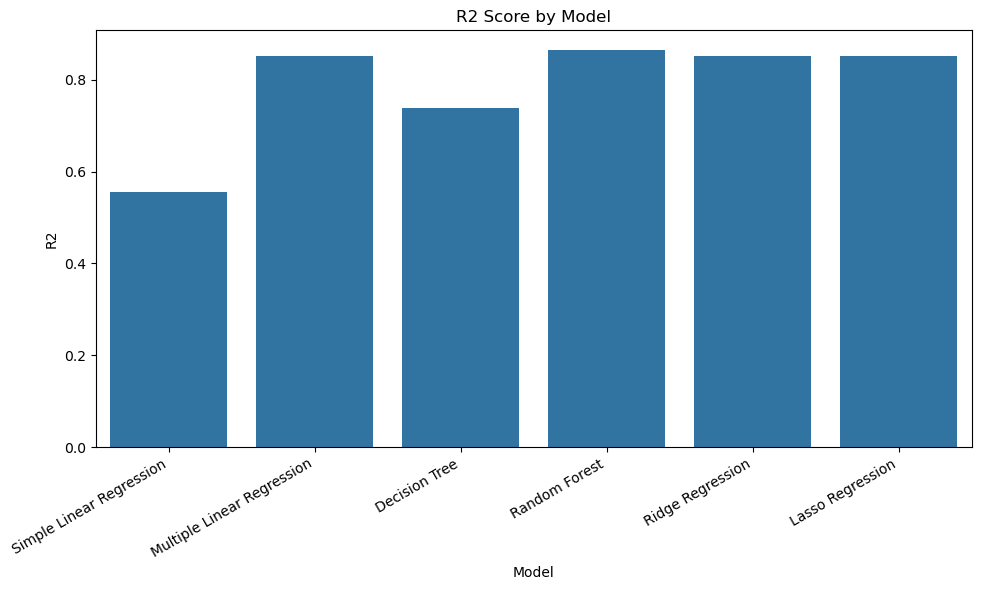

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='R2', data=results)
plt.title('R2 Score by Model')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig('../python_results/model_r2_comparison.png')
plt.show()

# Residual plots for the best model (Random Forest as example)

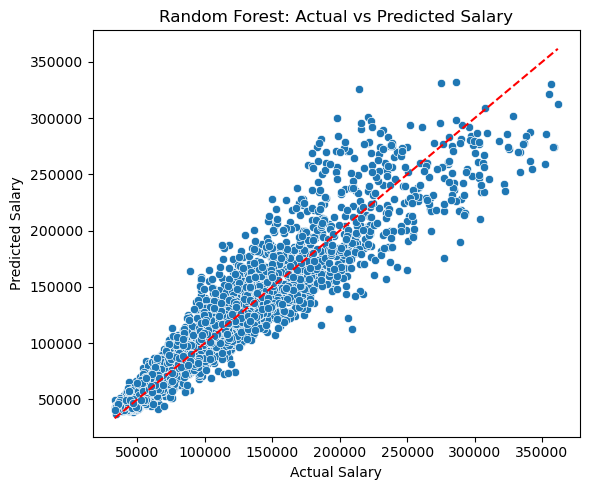

In [15]:
best_pred = y_pred_forest
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_test, y=best_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Random Forest: Actual vs Predicted Salary')
plt.tight_layout()
plt.savefig('../python_results/random_forest_actual_vs_predicted.png')
plt.show()

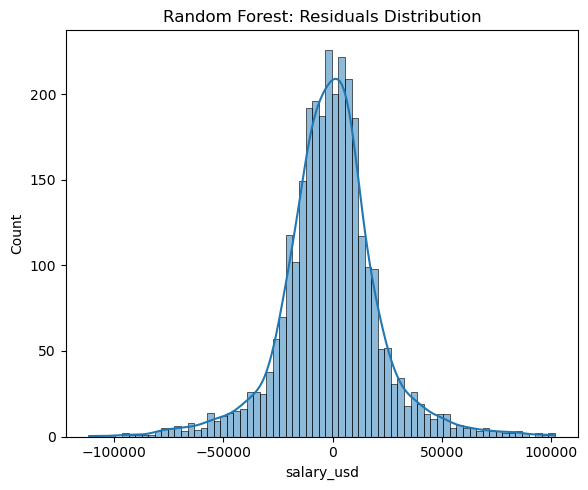

In [16]:
residuals = y_test - best_pred
plt.figure(figsize=(6,5))
sns.histplot(residuals, kde=True)
plt.title('Random Forest: Residuals Distribution')
plt.tight_layout()
plt.savefig('../python_results/random_forest_residuals.png')
plt.show()